In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from PIL import Image
import os
from numpy import array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report

[[[132 134 157]
  [142 144 169]
  [142 143 171]
  ...
  [ 37  59  20]
  [ 27  39  15]
  [ 31  37  23]]

 [[134 136 159]
  [144 146 171]
  [143 144 172]
  ...
  [ 43  65  27]
  [ 29  41  17]
  [ 18  24  10]]

 [[136 138 161]
  [146 148 173]
  [145 146 174]
  ...
  [ 75  97  61]
  [ 63  75  53]
  [ 33  39  25]]

 ...

 [[ 34   8   7]
  [ 40  16  14]
  [ 48  27  26]
  ...
  [121 106 137]
  [130 115 144]
  [122 108 133]]

 [[ 27   3   3]
  [ 39  15  15]
  [ 66  42  40]
  ...
  [103  88 119]
  [109  95 121]
  [ 99  85 110]]

 [[ 76  54  56]
  [ 80  59  58]
  [110  86  84]
  ...
  [ 86  71 100]
  [ 89  75 100]
  [ 77  63  86]]]


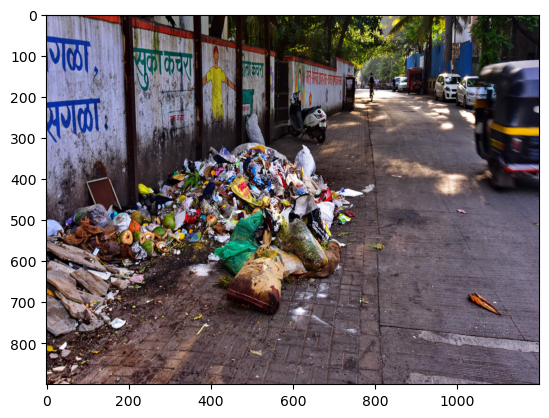

In [13]:
folder_path = r"C:\Users\yashs\Downloads\Road Dataset\Images\Images"
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        images_path = os.path.join(folder_path, filename)
        img = Image.open(images_path)
print(array(img))
arrn = array(img).reshape(900*1200*3,1)
plt.imshow(array(img))


In [14]:
df = pd.read_csv(r"C:\Users\yashs\Downloads\Road Dataset\metadata.csv", dtype = str)
df

,filename,label
0,dirty_2.jpg,1
1,clean_36.jpg,0
2,clean_31.jpg,0
3,dirty_69.jpg,1
4,clean_113.jpg,0
...,...,...
232,clean_83.jpg,0
233,dirty_123.jpg,1
234,dirty_76.jpg,1
235,clean_88.jpg,0


In [15]:
classes = ('clean', 'dirty')
n = 2
imsize = (128,128,3)
images = []
df['filepath'] = df['filename'].map(lambda x:  os.path.join(folder_path,x))
df


,filename,label,filepath
0,dirty_2.jpg,1,C:\Users\yashs\Downloads\Road Dataset\Images\I...
1,clean_36.jpg,0,C:\Users\yashs\Downloads\Road Dataset\Images\I...
2,clean_31.jpg,0,C:\Users\yashs\Downloads\Road Dataset\Images\I...
3,dirty_69.jpg,1,C:\Users\yashs\Downloads\Road Dataset\Images\I...
4,clean_113.jpg,0,C:\Users\yashs\Downloads\Road Dataset\Images\I...
...,...,...,...
232,clean_83.jpg,0,C:\Users\yashs\Downloads\Road Dataset\Images\I...
233,dirty_123.jpg,1,C:\Users\yashs\Downloads\Road Dataset\Images\I...
234,dirty_76.jpg,1,C:\Users\yashs\Downloads\Road Dataset\Images\I...
235,clean_88.jpg,0,C:\Users\yashs\Downloads\Road Dataset\Images\I...


0


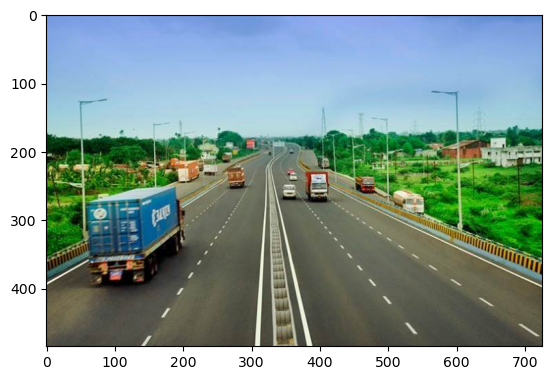

In [16]:
plt.imshow(Image.open(df['filepath'][2]))
print(df['label'][2])

In [17]:
array(Image.open(df['filepath'][0]))


array([[[ 39,  39,  39],
        [ 33,  33,  33],
        [ 41,  41,  41],
        ...,
        [ 86,  89,  70],
        [ 80,  83,  64],
        [ 48,  51,  32]],

       [[ 39,  39,  39],
        [ 35,  35,  35],
        [ 43,  43,  43],
        ...,
        [ 65,  70,  50],
        [ 67,  72,  52],
        [ 51,  56,  36]],

       [[ 39,  39,  39],
        [ 37,  37,  37],
        [ 47,  47,  47],
        ...,
        [ 43,  51,  30],
        [ 51,  59,  38],
        [ 58,  66,  45]],

       ...,

       [[117, 118, 113],
        [118, 119, 114],
        [120, 121, 116],
        ...,
        [133, 135, 121],
        [132, 134, 120],
        [139, 141, 127]],

       [[110, 111, 106],
        [112, 113, 108],
        [115, 116, 111],
        ...,
        [135, 137, 123],
        [135, 137, 123],
        [144, 146, 132]],

       [[109, 110, 105],
        [132, 133, 128],
        [127, 128, 123],
        ...,
        [139, 141, 127],
        [137, 139, 125],
        [140, 142, 128]]

In [18]:
IMG_SHAPE = 256
BATCH_SIZE = 32
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=42) 
# Split the images into test and train sets


## Building the Convolutional Neural Network

In [19]:
model1 = tf.keras.Sequential()
model1.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu",padding='same',strides=1))
model1.add(MaxPooling2D())
model1.add(Conv2D(64,(2,2),strides=2,activation="relu",padding='same'))
model1.add(MaxPooling2D())
model1.add(Conv2D(128,(2,2),strides=1,activation="relu",padding='same'))
model1.add(MaxPooling2D())
model1.add(Conv2D(256,(2,2),strides=1,activation="relu",padding='same'))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(256,activation="relu"))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 19, 19, 128)       32896     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 128)       

## Data Augmentation and Preparing the test and train data to be used in the model 

In [23]:
model1.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.FalseNegatives()])
IMG_SHAPE = 256
BATCH_SIZE = 32

traingen=ImageDataGenerator(rescale=1/255.,
                        brightness_range=[0.4,1.4],rotation_range =10 ,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        horizontal_flip=True,)


testgen=ImageDataGenerator(rescale=1/255.)


traindata = traingen.flow_from_dataframe(df_train, target_size =(150,150), 
                                        x_col='filepath',y_col='label',
                                        batch_size= BATCH_SIZE, class_mode="binary" )

testdata = testgen.flow_from_dataframe(df_test, target_size =(150,150), 
                                    shuffle = False,
                                    x_col='filepath',y_col='label',
                                    batch_size= BATCH_SIZE, class_mode="binary" )


Found 189 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.


In [24]:

model1.fit(traindata, epochs = 75)

Epoch 1/75
6/6 [==============================] - 9s 1s/step - loss: 0.3733 - binary_accuracy: 0.8307 - false_negatives: 14.0000
Epoch 2/75
6/6 [==============================] - 6s 1s/step - loss: 0.3018 - binary_accuracy: 0.8624 - false_negatives: 17.0000
Epoch 3/75
6/6 [==============================] - 6s 1s/step - loss: 0.2243 - binary_accuracy: 0.9206 - false_negatives: 5.0000
Epoch 4/75
6/6 [==============================] - 6s 1s/step - loss: 0.2481 - binary_accuracy: 0.8889 - false_negatives: 14.0000
Epoch 5/75
6/6 [==============================] - 6s 993ms/step - loss: 0.2320 - binary_accuracy: 0.9259 - false_negatives: 7.0000
Epoch 6/75
6/6 [==============================] - 6s 1s/step - loss: 0.1915 - binary_accuracy: 0.9312 - false_negatives: 6.0000
Epoch 7/75
6/6 [==============================] - 7s 1s/step - loss: 0.1974 - binary_accuracy: 0.9101 - false_negatives: 12.0000
Epoch 8/75
6/6 [==============================] - 8s 1s/step - loss: 0.2212 - binary_accuracy: 0.

In [26]:
model1.evaluate(testdata)
ypred = model1.predict(testdata)
cr = classification_report(testdata.classes, ypred.round())
print(cr)

2/2 [==============================] - 2s 570ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.91      1.00      0.95        21

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [34]:
accuracy = model1.evaluate(testdata)[1]
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 3s 1s/step - loss: 0.1773 - binary_accuracy: 0.9583 - false_negatives: 0.0000e+00
Accuracy: 95.83


# Accuracy achieved- 
Training set- 96.3%  (max binary accuracy)
Test set- 95.83%


# F1 score - 0.95